# Loading and Saving Data in Spark

Collab Only code:

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

**Not on Colab you should start form HERE:**

Reading a text file `textFile()` in Python

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()

sc = spark.sparkContext
lines = sc.textFile("spark-3.1.1-bin-hadoop3.2/README.md")

In [3]:
lines

spark-3.1.1-bin-hadoop3.2/README.md MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [4]:
# collect the RDD to a list
list_lines = lines.collect()

In [5]:
# print the list
for line in list_lines:
  print(line)

# Apache Spark

Spark is a unified analytics engine for large-scale data processing. It provides
high-level APIs in Scala, Java, Python, and R, and an optimized engine that
supports general computation graphs for data analysis. It also supports a
rich set of higher-level tools including Spark SQL for SQL and DataFrames,
MLlib for machine learning, GraphX for graph processing,
and Structured Streaming for stream processing.

<https://spark.apache.org/>

[![Jenkins Build](https://amplab.cs.berkeley.edu/jenkins/job/spark-master-test-sbt-hadoop-2.7-hive-2.3/badge/icon)](https://amplab.cs.berkeley.edu/jenkins/job/spark-master-test-sbt-hadoop-2.7-hive-2.3)
[![AppVeyor Build](https://img.shields.io/appveyor/ci/ApacheSoftwareFoundation/spark/master.svg?style=plastic&logo=appveyor)](https://ci.appveyor.com/project/ApacheSoftwareFoundation/spark)
[![PySpark Coverage](https://img.shields.io/badge/dynamic/xml.svg?label=pyspark%20coverage&url=https%3A%2F%2Fspark-test.github.io%2Fpyspark-coverage-si

Loading all the .md files in one directory

In [6]:
input = sc.textFile("spark-3.1.1-bin-hadoop3.2/*.md")

**Only in Google Colab:**

Load the example1.json JSON file (found on iCollege under Datasets)

In [7]:
from google.colab import files
files.upload()

Saving log_test.json to log_test.json


{'log_test.json': b'{\n    "test month": "May",\n    "list new stores": [\n        "Lake Purple City_Branch",\n        "New Road Branch",\n        "Xintaifu Square Branch"\n    ],\n    "list top correlated stores of new stores": {\n        "Lake Purple City Branch": [\n            433023,\n            433024,\n            433043,\n            433040,\n            433042,\n            433010,\n            433028,\n            433004,\n            433047,\n            433035,\n            433019,\n            433021,\n            433048,\n            433029,\n            433007,\n            433026,\n            433005,\n            433027,\n            433012,\n            433018,\n            433011,\n            433008,\n            433036,\n            433032,\n            433013,\n            433044,\n            433017,\n            433006,\n            433025\n        ],\n        "New Road Branch": [\n            433023,\n            433034,\n            433003,\n            43300

In [8]:
jsonDF = spark.read.json('log_test.json')
jsonDF.printSchema()

root
 |-- _corrupt_record: string (nullable = true)



# Saving Text Files

Using the USDA_activity_dataset_csv dataset (found on iCollege under Datasets)

**Only in Google Colab:**

Load the USDA file from Disk. 

NOTEL: Convert it to CSV on Excel first! 

Note: You might have to run this twice so it works fine.

In [15]:
from google.colab import files
files.upload()

Saving cat.jpg to cat.jpg


{'cat.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\n\x07\x08\x16\x16\x15\x18\x16\x15\x16\x19\x18\x18\x1a\x1a\x1a\x18\x18\x18\x18\x18\x18\x18\x1a\x18\x18\x18\x18\x1a\x1a\x18\x1a\x19\x18\x1c!.%\x1c\x1e+!\x18\x18&8&+/1555\x1a$;@;4?.451\x01\x0c\x0c\x0c\x10\x0f\x10\x1a\x12\x12\x1e4+$!44444444444444444444444444444444444444444444444444\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x01\x02\x03\x05\x06\x07\x08\xff\xc4\x00>\x10\x00\x02\x01\x02\x04\x04\x04\x03\x06\x04\x04\x06\x03\x00\x00\x00\x01\x02\x00\x03\x11\x04\x12!1\x05AQa\x06"q\x812\x91\xa1\x13B\xb1\xc1\xd1\xe1\x14Rb\xf0r\x82\x92\xf1\x15#\xa2\xb2\xc2\xd2\x07\x163\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xc4\x00\x1d\x11\x01\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x12!1AQq\

**Reading a CSV file into a DataFrame, filter some columns and save it**

In [10]:
data = spark.read.csv('loan_data.csv',inferSchema=True, header=True)
data.show(6)

+-------------+------------------+--------+-----------+--------------+-----+----+-----------------+---------+----------+--------------+-----------+-------+--------------+
|credit.policy|           purpose|int.rate|installment|log.annual.inc|  dti|fico|days.with.cr.line|revol.bal|revol.util|inq.last.6mths|delinq.2yrs|pub.rec|not.fully.paid|
+-------------+------------------+--------+-----------+--------------+-----+----+-----------------+---------+----------+--------------+-----------+-------+--------------+
|            1|debt_consolidation|  0.1189|      829.1|   11.35040654|19.48| 737|      5639.958333|    28854|      52.1|             0|          0|      0|             0|
|            1|       credit_card|  0.1071|     228.22|   11.08214255|14.29| 707|           2760.0|    33623|      76.7|             0|          0|      0|             0|
|            1|debt_consolidation|  0.1357|     366.86|   10.37349118|11.63| 682|           4710.0|     3511|      25.6|             1|          

Filter data by several columns

In [11]:
dataF = data.select("purpose","dti","fico")

Save only the filtered Data

In [12]:
dataF.write.csv("credits.csv")

Let's read this new file back into an RDD

In [13]:
rddL=sc.textFile("credits.csv")
rddL.collect()

['debt_consolidation,19.48,737',
 'credit_card,14.29,707',
 'debt_consolidation,11.63,682',
 'debt_consolidation,8.1,712',
 'credit_card,14.97,667',
 'credit_card,16.98,727',
 'debt_consolidation,4.0,667',
 'all_other,11.08,722',
 'home_improvement,17.25,682',
 'debt_consolidation,10.0,707',
 'debt_consolidation,22.09,677',
 'debt_consolidation,9.16,662',
 'debt_consolidation,15.49,767',
 'small_business,6.5,747',
 'debt_consolidation,9.73,727',
 'major_purchase,13.04,702',
 'all_other,2.26,672',
 'credit_card,7.07,797',
 'debt_consolidation,3.8,712',
 'major_purchase,2.74,667',
 'all_other,16.08,772',
 'all_other,2.59,797',
 'credit_card,7.94,662',
 'credit_card,7.05,782',
 'debt_consolidation,8.8,672',
 'all_other,10.0,712',
 'all_other,0.28,802',
 'debt_consolidation,14.29,662',
 'all_other,0.28,772',
 'all_other,3.72,812',
 'debt_consolidation,2.3,742',
 'credit_card,6.4,692',
 'home_improvement,0.0,777',
 'home_improvement,11.33,762',
 'credit_card,15.55,757',
 'all_other,3.83,772

In [16]:
# Load image data
from pyspark.ml.image import ImageSchema

image = spark.read.format("image").load("cat.jpg")

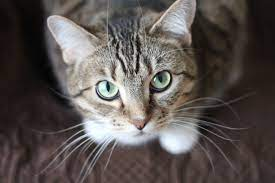

In [17]:
from IPython.display import display, Image
display(Image(filename='cat.jpg'))

In [18]:
# using SQLContext to read parquet file
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# to read parquet file
df = sqlContext.read.parquet('userdata1.parquet')

In [19]:
df.show(5)

+-------------------+---+----------+---------+--------------------+------+--------------+----------------+------------+---------+---------+--------------------+--------+
|  registration_dttm| id|first_name|last_name|               email|gender|    ip_address|              cc|     country|birthdate|   salary|               title|comments|
+-------------------+---+----------+---------+--------------------+------+--------------+----------------+------------+---------+---------+--------------------+--------+
|2016-02-03 07:55:29|  1|    Amanda|   Jordan|    ajordan0@com.com|Female|   1.197.201.2|6759521864920116|   Indonesia| 3/8/1971| 49756.53|    Internal Auditor|   1E+02|
|2016-02-03 17:04:03|  2|    Albert|  Freeman|     afreeman1@is.gd|  Male|218.111.175.34|                |      Canada|1/16/1968|150280.17|       Accountant IV|        |
|2016-02-03 01:09:31|  3|    Evelyn|   Morgan|emorgan2@altervis...|Female|  7.161.136.94|6767119071901597|      Russia| 2/1/1960|144972.51| Structural

# **Hive Example**

Using Hive to create and read a table - Simple Example

In [20]:
from pyspark.sql import Row
from pyspark.sql import HiveContext
sqlContext = HiveContext(sc)
test_list = [('A', 25),('B', 20),('C', 25),('D', 18)]
rdd = sc.parallelize(test_list)
people = rdd.map(lambda x: Row(name=x[0], age=int(x[1])))
schemaPeople = sqlContext.createDataFrame(people)
# Register it as a temp table
sqlContext.registerDataFrameAsTable(schemaPeople, "test_table")
sqlContext.sql("show tables").show()

+--------+----------+-----------+
|database| tableName|isTemporary|
+--------+----------+-----------+
|        |test_table|       true|
+--------+----------+-----------+



Let's query the table

In [21]:
sqlContext.sql("Select * from test_table").show()

+----+---+
|name|age|
+----+---+
|   A| 25|
|   B| 20|
|   C| 25|
|   D| 18|
+----+---+



**Load a JSON file with Hive and use SQL on it**

In [ ]:
## Colab code only - DO NOT run outsie of colab
from google.colab import files  
files.upload()

Saving log_test.json to log_test (1).json


{'log_test.json': b'{\n    "test month": "May",\n    "list new stores": [\n        "Lake Purple City_Branch",\n        "New Road Branch",\n        "Xintaifu Square Branch"\n    ],\n    "list top correlated stores of new stores": {\n        "Lake Purple City Branch": [\n            433023,\n            433024,\n            433043,\n            433040,\n            433042,\n            433010,\n            433028,\n            433004,\n            433047,\n            433035,\n            433019,\n            433021,\n            433048,\n            433029,\n            433007,\n            433026,\n            433005,\n            433027,\n            433012,\n            433018,\n            433011,\n            433008,\n            433036,\n            433032,\n            433013,\n            433044,\n            433017,\n            433006,\n            433025\n        ],\n        "New Road Branch": [\n            433023,\n            433034,\n            433003,\n            43300

Let's load example1.json with Hive a do a Select Statement on it

In [22]:
from pyspark.sql import HiveContext
hiveCtx = HiveContext(sc)
ex1 = hiveCtx.read.json("log_test.json", multiLine=True)
ex1.registerTempTable("ex1")
results = hiveCtx.sql("SELECT targets FROM ex1").show()

+--------------------+
|             targets|
+--------------------+
|[turn_over_tax_ex...|
+--------------------+



In [23]:
results = hiveCtx.sql("SELECT * FROM ex1").show()

+--------------------+--------------------+----------------------------------------+--------------------+----------+
|          data_types|     list new stores|list top correlated stores of new stores|             targets|test month|
+--------------------+--------------------+----------------------------------------+--------------------+----------+
|[df_pos_workday_m...|[Lake Purple City...|                    {[433023, 433024,...|[turn_over_tax_ex...|       May|
+--------------------+--------------------+----------------------------------------+--------------------+----------+

